In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, Input

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("First few rows of the training data:")
print(train_data.head())

print("\nInformation about the training data:")
print(train_data.info())

print("\nMissing values in the training data:")
print(train_data.isnull().sum())

First few rows of the training data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixe

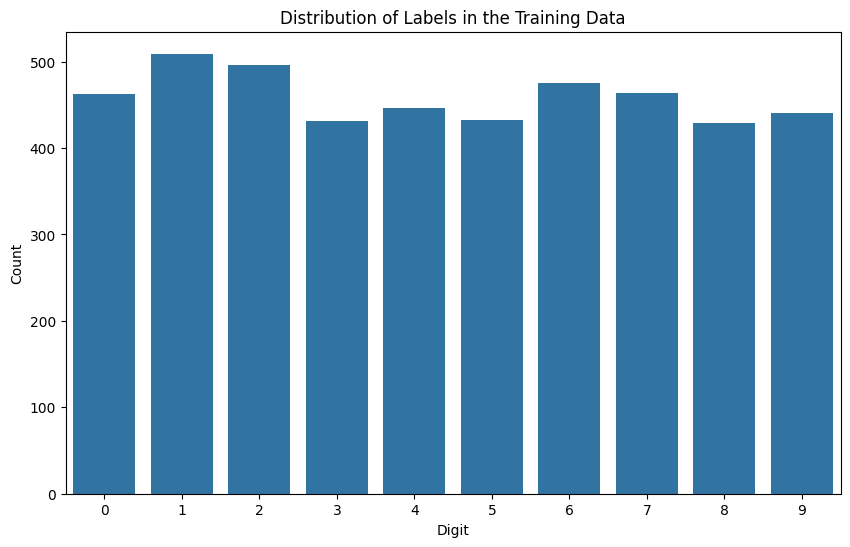

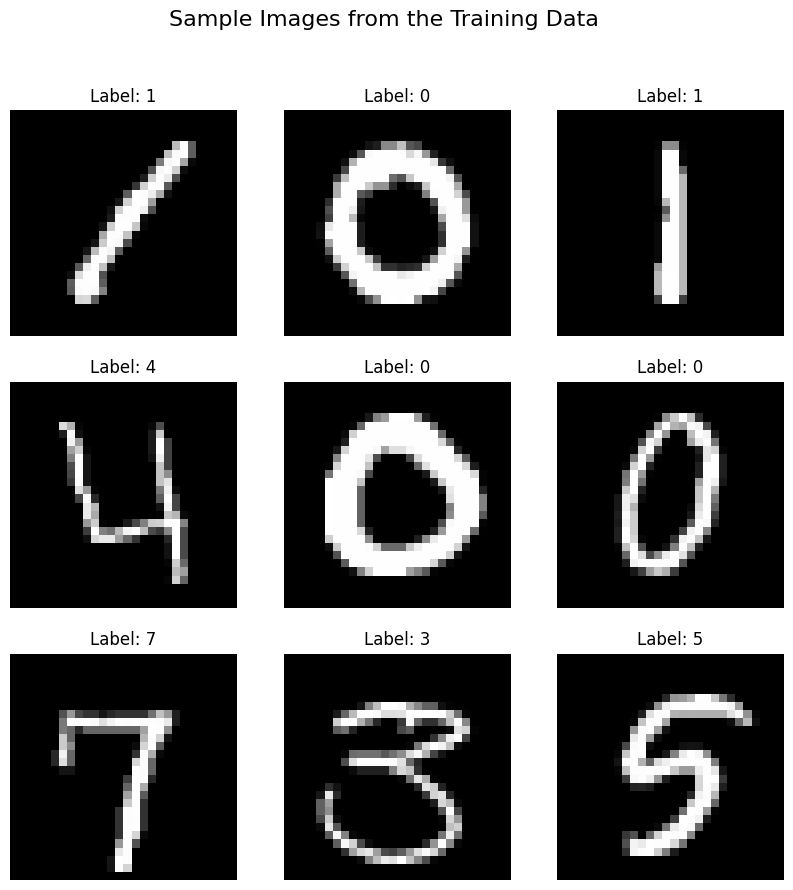

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Labels in the Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.savefig("label_distribution.png")
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train_data.iloc[i, 0]}")
    ax.axis('off')
plt.suptitle('Sample Images from the Training Data', fontsize=16)
plt.savefig("sample_images.png")
plt.show()

In [3]:
X = train_data.drop(columns=['label']).values.reshape(-1, 28, 28, 1) / 255.0
y = train_data['label'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

input_layer = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
115/115 [==============================] - 5s 32ms/step - loss: 0.8263 - accuracy: 0.7355 - val_loss: nan - val_accuracy: 0.8975
Epoch 2/10
115/115 [==============================] - 5s 44ms/step - loss: 0.2184 - accuracy: 0.9386 - val_loss: nan - val_accuracy: 0.9487
Epoch 3/10
115/115 [==============================] - 3s 27ms/step - loss: 0.1498 - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9542
Epoch 4/10
115/115 [==============================] - 3s 27ms/step - loss: 0.0991 - accuracy: 0.9695 - val_loss: nan - val_accuracy: 0.9640
Epoch 5/10
115/115 [==============================] - 3s 27ms/step - loss: 0.0682 - accuracy: 0.9801 - val_loss: nan - val_accuracy: 0.9662
Epoch 6/10
115/115 [==============================] - 5s 41ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: nan - val_accuracy: 0.9618
Epoch 7/10
115/115 [==============================] - 3s 28ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: nan - val_accuracy: 0.9662
Epoch 8/10
115/115 [

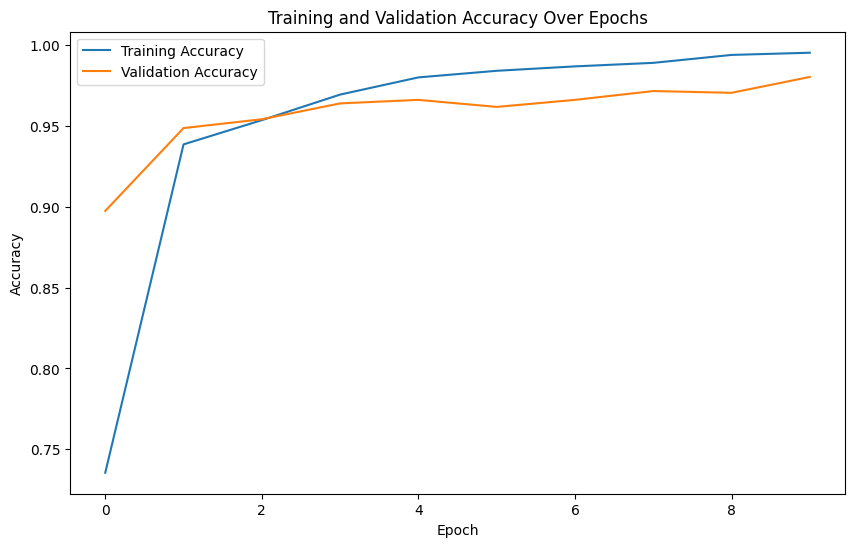

29/29 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.9804
Training Accuracy: 0.9989
Validation Accuracy: 0.9804
162/162 [==============================] - 1s 8ms/step


In [4]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0
predictions_probs = model.predict(X_test)
predictions = np.argmax(predictions_probs, axis=1)

submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)